In [ ]:
# import hvplot.pandas # Enable 'hvplot' accessor on Geodataframes for interactive plotting
# from ipywidgets import Layout
import h5py
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import argparse
from pathlib import Path
import glob
# import leafmap.leafmap as leafmap
# import geopandas as gpd
# from ipyleaflet import Map, basemaps, ImageOverlay, projections, GeoJSON, GeoData, WMSLayer, Marker
# import odc.geo.xr
import netCDF4
from dea_tools.plotting import xr_animation
import os
import tqdm

In [ ]:
def paths_to_datetimeindex(paths, string_slice=(0, 10), form='%Y%m'):
    """
    Helper function to generate a Pandas datetimeindex object
    from dates contained in a file path string.
    Parameters
    ----------
    paths : list of strings
        A list of file path strings that will be used to extract times
    string_slice : tuple
        An optional tuple giving the start and stop position that
        contains the time information in the provided paths. These are
        applied to the basename (i.e. file name) in each path, not the
        path itself. Defaults to (0, 10).
    Returns
    -------
    A pandas.DatetimeIndex object containing a 'datetime64[ns]' derived
    from the file paths provided by `paths`.
    """
    date_strings = [os.path.basename(i)[slice(*string_slice)]
                    for i in paths]
    return pd.to_datetime(date_strings, format=form)

In [ ]:
filelist=[]
path = '/g/data/gv90/P6_data/ICESat2/ATL20/'
# filelist = [file for file in os.listdir(path) if file.endswith('.h5')]
print("Finding files")
for file in Path(path).rglob('*.h5'):
    filelist.append(file)

filelist = sorted(filelist, key=lambda i: int(os.path.splitext(os.path.basename(i)[9:17])[0]))
print(f"Processing {len(filelist)} files")

dims = xr.open_dataset(filelist[0])

Finding files
Processing 94 files


In [ ]:
# ds_list = []
# print(f"Processing {len(filelist)} files")
# for fname in filelist:
#     print('\r', 'Opening:', fname, end='')
#         # Open dataset
#     ds = xr.open_dataset(str(fname), group='monthly')
#     ds = ds.squeeze().expand_dims(time=ds['delta_time_beg'])
#     # Convert to dataframe
# #     ds = ds['mean_fb']
#     # Create spatial dataframe
#     # append to list
#     ds_list.append(ds)
    

# # Combine into a single file        
# ATL20 = xr.concat(ds_list, dim='time')

# ATL20 = ATL20.assign_coords({'grid_x':dims['grid_x'], 'grid_y':dims['grid_y']})

In [ ]:
time_var = xr.Variable('time', paths_to_datetimeindex(filelist,
                                                      string_slice=(9,15), form='%Y%m'))
ds = xr.concat([xr.open_dataset(i, group='monthly').squeeze() for i in filelist],
                        dim=time_var)
ds = ds.assign_coords({'grid_x':dims['grid_x'], 'grid_y':dims['grid_y']})

ValueError: cannot reindex or align along dimension 'grid_y' because of conflicting dimension sizes: {448, 332}

In [10]:
mean = ds['mean_fb'].groupby('time.month').mean('time')

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


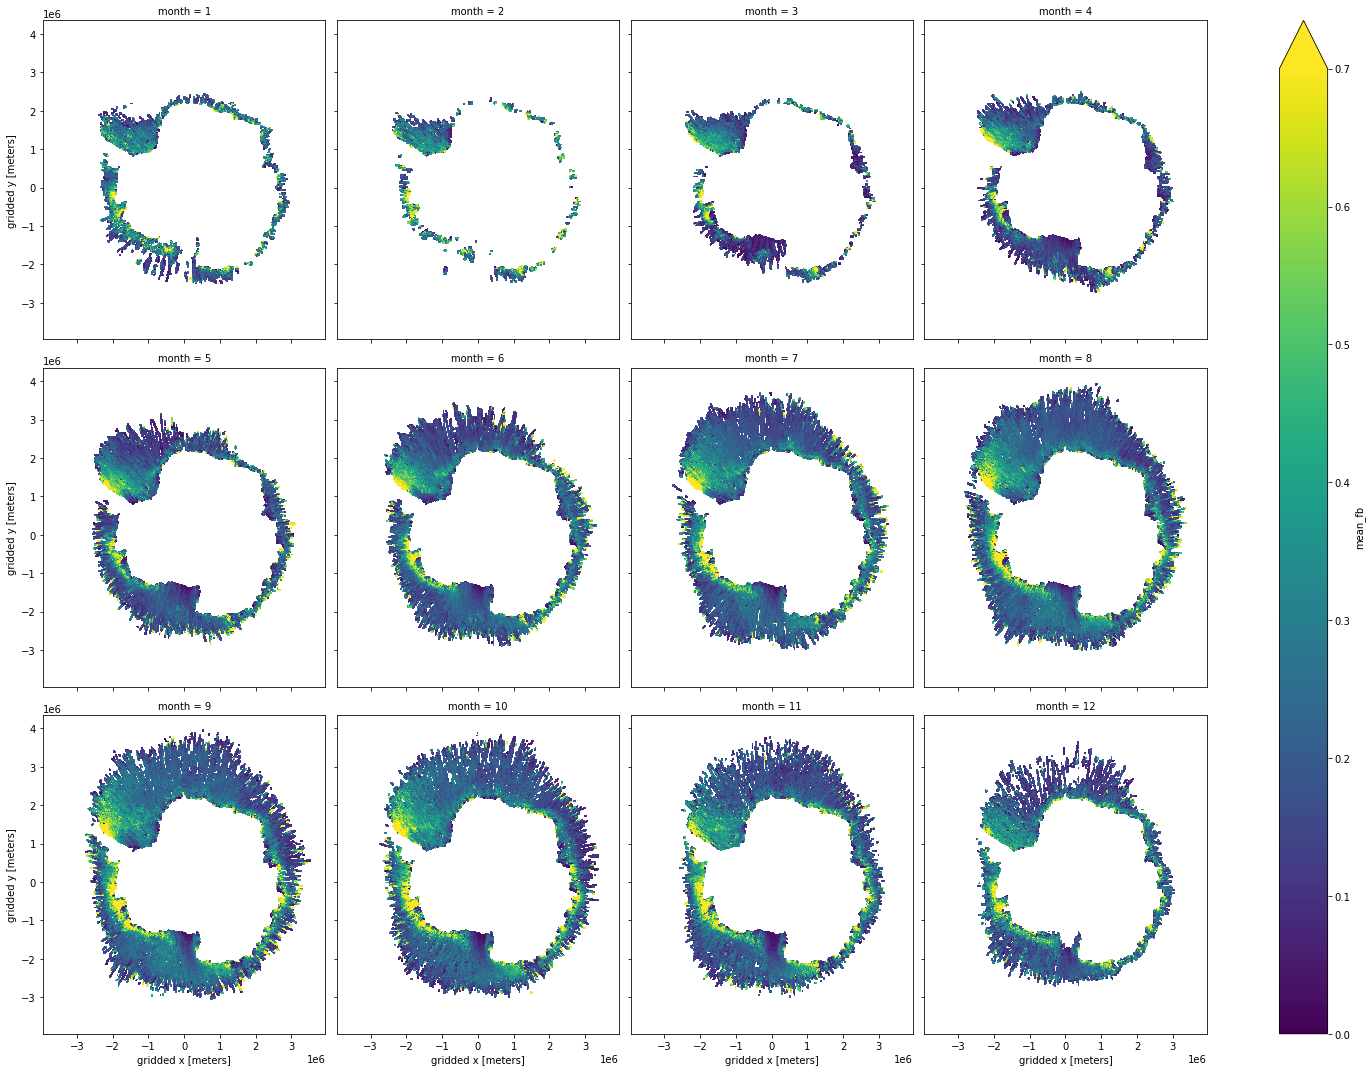

In [11]:
mean.plot(col="month", col_wrap=4, vmax=0.7, size=5)
plt.savefig('/g/data/jk72/sc0554/ATL20_alltime_monthly_mean_fb.png')

In [12]:
ds.to_netcdf('/g/data/jk72/sc0554/ATL20.nc')

In [13]:
xr.open_dataset('/g/data/jk72/sc0554/ATL20.nc')['time']

<xarray.DataArray 'time' (time: 42)>
array(['2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-02-01T00:00:00.000000000', '2020-03-01T00:00:00.000000000',
       '2020-04-01T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-06-01T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-08-01T00:00:00.000000000', '2020-09-01T00:00:00.000000000',
       '2020-10-01T00:00:00.000000000', '2020-11-01T00:00:00.000000000',
       '2020-12-01T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-02-01T00:00:00.000000000', '2021-03-01T00:00:00.000000000',
       '2021-04-01T00:00:00.000000000', '2021-05-01T00:00:00.000000000',
       '2021-06-01T00:00:00.000000000', '2021-07-01T00:00:00.000000000',
       '2021-08-01T00:00:00.000000000', '2021-09-01T00:00:00.000000000',
       '2021-10-01T00:00:00.000000000', '2021-11-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000', '2022-01-01T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-01 2018-11-01 ... 2022-03-01

In [ ]:
ds['mean_fb'].sel(time=slice("2021-01-01","2021-12-31")).plot(col="time", col_wrap=4, vmax=0.7, size=5)
plt.save_fig('/g/data/jk72/sc0554/ATL20_mean_fb_2021')

In [ ]:
ATL20.to_netcdf('/g/data/jk72/sc0554/ATL20.nc')

In [ ]:
xr.open_dataset('/g/data/jk72/sc0554/ATL20.nc')

In [ ]:
ATL20.isel(time=0)['mean_fb'].plot()

## Old method

In [ ]:
test = xr.open_dataset(filelist[0], group='monthly')

In [ ]:
da = xr.DataArray(

    data=test['mean_fb'].values,

    dims=["grid_x", "grid_y"],

    coords=[dims['grid_y'], dims['grid_x']]

    )

In [ ]:
da.to_netcdf('/g/data/jk72/sc0554/testfb.nc')

In [ ]:
import h5py

with h5py.File(filelist[1], "r") as f:
    # Print all root level object names (aka keys) 
    # these can be group or dataset names 
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[4]
    print(type(f[a_group_key])) 
    data = list(f[a_group_key])
    lat = f['grid_lat']
    mean_fb = f['monthly']['mean_fb'][()]
    print(mean_fb.shape)
    print(lat)
    # preferred methods to get dataset values:
#     ds_obj = f[a_group_key]      # returns as a h5py dataset object
#     ds_arr = f[a_group_key][()]  # returns as a numpy array

In [ ]:
time_var = xr.Variable('time', paths_to_datetimeindex(filelist,
                                                      string_slice=(9,15), form='%Y%m'))

In [ ]:
ds = xr.concat([xr.open_dataset(i, group='monthly').squeeze() for i in filelist],
                        dim=time_var)

In [ ]:
ds_log = xr.apply_ufunc(np.flipud, ds['mean_fb'], vectorize=True)

In [ ]:
ds.isel(time=23+12)

In [ ]:
import matplotlib.pyplot as plt
x = np.flipud(np.flipud(ds.isel(time=23+12)['mean_fb'].values))
plt.imshow(x, vmin=0,vmax=0.5)

In [ ]:
ds['mean_fb'].sel(time="2021-09-01")[::-1].plot(vmax=0.5, size=15)

In [ ]:
ds['mean_fb'][::-1].sel(time=slice("2021-01-01","2021-12-31")).plot(col="time", col_wrap=4, vmax=0.5, size=10)

In [ ]:
xr_animation(ds, bands='mean_fb')

In [ ]:
ds.isel(time=0).time

## Misc

In [ ]:
# Test plot

gf_list[0].plot.scatter('latitude', 'beam_fb_height')

In [ ]:
# Write out to csv (can be loaded as delimited text file into qgis

gfs.to_csv("/g/data/jk72/sc0554/floes/beam_fb_height.csv")

In [ ]:
from shapely.geometry import LineString
df['line'] = df.apply(lambda row: LineString([row['fr_point'], row['to_point']]), axis=1) #Create a linestring column

In [ ]:
gfs['longitude'].plot()

In [ ]:
filtered = gfs[(-60 < gfs.longitude) & (gfs.longitude < 0)]

In [ ]:
# plot the polygon vectors
from ipyleaflet import Map, basemaps, GeoData, GeoJSON, LayerGroup, LayersControl, LegendControl, projections, Choropleth
from ipywidgets import Layout
import matplotlib.colors as mplcolors
import matplotlib.cm



colors=['red', 'yellow', 'green', 'orange']



def my_func(feature):
    print(feature['properties']['ID'])
    print('----')
    return {'color':colors[feature['properties']['ID']]}


#somewhere to show the results
spsLayout=Layout(width='600px', height='600px')
zoom = 0.85
center = [-70, 130]
map = Map(basemap=basemaps.NASAGIBS.BlueMarble3031, center=center, zoom=zoom, crs=projections.EPSG3031, layout=spsLayout )
map.add_layer(GeoJSON(data=json.loads(gdf.to_json()), style_callback=my_func))

In [ ]:
import branca.colormap as cm
step = cm.StepColormap(['blue','red'],
                           vmin = int(filtered['beam_fb_height'].min()), vmax = int(filtered['beam_fb_height'].max()))
colors = step.to_linear()

colors

In [ ]:
type(colors)

In [ ]:
filtered['beam_fb_height']

In [ ]:
geo_data = GeoData(geo_dataframe = filtered,
    style={'color': 'black', 'radius':4, 'fillColor': '#3366cc', 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
    hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    name = 'ICESAT2')

# Create custom projection with bounds for Polar view WMS layer
POLAR3031 = dict(
    name='EPSG:3031',
    custom=True,
    proj4def="""+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1
        +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs""",
    bounds =[[-2822131.5,-3057369.25],[3744213.75,3822194.25]]
)

graticule = WMSLayer(
    url='http://geos.polarview.aq/geoserver/wms',
    layers='polarview:graticuleS',
    format='image/png',
    transparent=True,
    attribution='Polarview',
    crs=POLAR3031
)

In [ ]:
# Create map layer
spsLayout=Layout(width='800px', height='800px')
m = Map(basemap=basemaps.NASAGIBS.BlueMarble3031, center=(-90, 0), zoom=1, crs=projections.EPSG3031, layout=spsLayout)
m.add_layer(geo_data)
m.add_layer(graticule)
m